In [2]:
# Standard Headers
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import random as rand
import itertools as it

from pandas import DataFrame, Series

from scipy.cluster import hierarchy as hier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.model_selection import StratifiedKFold

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [3]:
#aggregating datasets
popData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/pop_music_data.csv', header=None)
popData.insert(22, 'pop', 1, allow_duplicates = True)
popData.insert(23, 'metal', 0, allow_duplicates = True)
popData.insert(24, 'rock', 0, allow_duplicates = True)
popData.insert(25, 'hiphop', 0, allow_duplicates = True)
popData.insert(26, 'blues', 0, allow_duplicates = True)
popData.insert(27, 'indie', 0, allow_duplicates = True)
popData.insert(28, 'genre', 0, allow_duplicates = True)
popData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
popData = popData.drop(labels=0, axis=0)

metalData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/metal_music_data.csv', header=None)
metalData.insert(22, 'pop', 0, allow_duplicates = True)
metalData.insert(23, 'metal', 1, allow_duplicates = True)
metalData.insert(24, 'rock', 0, allow_duplicates = True)
metalData.insert(25, 'hiphop', 0, allow_duplicates = True)
metalData.insert(26, 'blues', 0, allow_duplicates = True)
metalData.insert(27, 'indie', 0, allow_duplicates = True)
metalData.insert(28, 'genre', 1, allow_duplicates = True)
metalData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
metalData = metalData.drop(labels=0, axis=0)

rockData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/rock_music_data.csv', header=None)
rockData.insert(22, 'pop', 0, allow_duplicates = True)
rockData.insert(23, 'metal', 0, allow_duplicates = True)
rockData.insert(24, 'rock', 1, allow_duplicates = True)
rockData.insert(25, 'hiphop', 0, allow_duplicates = True)
rockData.insert(26, 'blues', 0, allow_duplicates = True)
rockData.insert(27, 'indie', 0, allow_duplicates = True)
rockData.insert(28, 'genre', 2, allow_duplicates = True)
rockData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
rockData = rockData.drop(labels=0, axis=0)

hiphopData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/hiphop_music_data.csv', header=None)
hiphopData.insert(22, 'pop', 0, allow_duplicates = True)
hiphopData.insert(23, 'metal', 0, allow_duplicates = True)
hiphopData.insert(24, 'rock', 0, allow_duplicates = True)
hiphopData.insert(25, 'hiphop', 1, allow_duplicates = True)
hiphopData.insert(26, 'blues', 0, allow_duplicates = True)
hiphopData.insert(27, 'indie', 0, allow_duplicates = True)
hiphopData.insert(28, 'genre', 3, allow_duplicates = True)
hiphopData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
hiphopData = hiphopData.drop(labels=0, axis=0)

bluesData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/blues_music_data.csv', header=None)
bluesData.insert(22, 'pop', 0, allow_duplicates = True)
bluesData.insert(23, 'metal', 0, allow_duplicates = True)
bluesData.insert(24, 'rock', 0, allow_duplicates = True)
bluesData.insert(25, 'hiphop', 0, allow_duplicates = True)
bluesData.insert(26, 'blues', 1, allow_duplicates = True)
bluesData.insert(27, 'indie', 0, allow_duplicates = True)
bluesData.insert(28, 'genre', 4, allow_duplicates = True)
bluesData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
bluesData = bluesData.drop(labels=0, axis=0)

indieData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/indie_alt_music_data.csv', header=None)
indieData.insert(22, 'pop', 0, allow_duplicates = True)
indieData.insert(23, 'metal', 0, allow_duplicates = True)
indieData.insert(24, 'rock', 0, allow_duplicates = True)
indieData.insert(25, 'hiphop', 0, allow_duplicates = True)
indieData.insert(26, 'blues', 0, allow_duplicates = True)
indieData.insert(27, 'indie', 1, allow_duplicates = True)
indieData.insert(28, 'genre', 5, allow_duplicates = True)
indieData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
indieData = indieData.drop(labels=0, axis=0)

altData = pd.read_csv('https://raw.githubusercontent.com/Charliehyin/MusicRecommender/main/alternative_music_data.csv', header=None)
altData.insert(22, 'pop', 0, allow_duplicates = True)
altData.insert(23, 'metal', 0, allow_duplicates = True)
altData.insert(24, 'rock', 0, allow_duplicates = True)
altData.insert(25, 'hiphop', 0, allow_duplicates = True)
altData.insert(26, 'blues', 0, allow_duplicates = True)
altData.insert(27, 'indie', 0, allow_duplicates = True)
altData.insert(28, 'genre', 6, allow_duplicates = True)
altData.columns = ['artist name', 'track name', 'popularity', 'genres', 'playlist', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'pop', 'metal', 'rock', 'hiphop', 'blues', 'indie', 'genre']
altData = altData.drop(labels=0, axis=0)

data = pd.concat([popData.iloc[0:, :], metalData.iloc[0:, :], rockData.iloc[0:, :], hiphopData.iloc[0:, :], bluesData.iloc[0:, :], indieData.iloc[0:, :], altData.iloc[0:, :]])
data.head(5)
#data['popularity'].value_counts()
#use scikitlearn one hot encoding


,artist name,track name,popularity,genres,playlist,danceability,energy,key,loudness,mode,...,analysis_url,duration_ms,time_signature,pop,metal,rock,hiphop,blues,indie,genre
1,Prides,A Wilder Heart - Acoustic,40,[],Acoustic Hits,0.44,0.339,0,-8.191,1,...,https://api.spotify.com/v1/audio-analysis/4AF9...,241562,5,1,0,0,0,0,0,0
2,Sam Smith,Diamonds - Acoustic,59,"['dance pop', 'pop', 'post-teen pop', 'uk pop']",Hot Acoustics,0.489,0.284,10,-8.699,0,...,https://api.spotify.com/v1/audio-analysis/4y8O...,194542,4,1,0,0,0,0,0,0
3,The Polar Boys,Let Go,35,['miami indie'],Bedroom Pop,0.581,0.833,3,-6.509,1,...,https://api.spotify.com/v1/audio-analysis/2bpL...,207238,4,1,0,0,0,0,0,0
4,Ginger Root,Weather,46,['oc indie'],Bedroom Pop,0.726,0.817,11,-6.397,0,...,https://api.spotify.com/v1/audio-analysis/2D3g...,222976,4,1,0,0,0,0,0,0
5,Noa Kirel,'פאוץ,49,['israeli pop'],EQUAL Israel,0.795,0.658,7,-6.896,0,...,https://api.spotify.com/v1/audio-analysis/1Hg8...,167108,4,1,0,0,0,0,0,0


In [4]:
df = pd.DataFrame(data)
df['popularity'] = pd.to_numeric(df['popularity'])
df['danceability'] = pd.to_numeric(df['danceability'])
df['energy'] = pd.to_numeric(df['energy'])
#need to normalize key
df['key'] = pd.to_numeric(df['key'])
#need to normalize loudness
df['loudness'] = pd.to_numeric(df['loudness'])
df['speechiness'] = pd.to_numeric(df['speechiness'])
df['acousticness'] = pd.to_numeric(df['acousticness'])
df['liveness'] = pd.to_numeric(df['liveness'])
df['valence'] = pd.to_numeric(df['valence'])
#need to normalize tempo
df['tempo'] = pd.to_numeric(df['tempo'])
#need to normalize 
df['duration_ms'] = pd.to_numeric(df['duration_ms'])
df['pop'] = pd.to_numeric(df['pop'])
df['metal'] = pd.to_numeric(df['metal'])
df['rock'] = pd.to_numeric(df['rock'])
df['blues'] = pd.to_numeric(df['blues'])
df['hiphop'] = pd.to_numeric(df['hiphop'])
df['indie'] = pd.to_numeric(df['indie'])
df['genre'] = pd.to_numeric(df['genre'])

In [5]:
#change popularity from 0-100 to 1-33
def reframe(df): 
  result = df.copy()
  result['popularity'] = np.floor(df['popularity']/33)+1
  return result

df = reframe(df)

In [6]:
#feature selection 
data_Y = df['popularity']
data_X = df.drop(['genre','genres','playlist','artist name','track name','mode','instrumentalness', 'id','uri','track_href','analysis_url','time_signature', 'popularity', 'pop', 'metal', 'rock', 'blues', 'hiphop', 'indie'],axis=1)
#for the decision tree, make sure to drop popularity
print(data_X.shape) #26752 rows, 17 cols
print(data_Y.shape) #26752 rows, 1 col
print(type(data_X))

(26752, 10)
(26752,)
<class 'pandas.core.frame.DataFrame'>


In [7]:
#standardizing data
def standardize(df):
  result = df.copy()
  for feature_name in df.columns:
    if feature_name != 'pop' and feature_name != 'metal' and feature_name != 'rock' and feature_name != 'hiphop' and feature_name != 'blues' and feature_name != 'indie': 
      max_value = df[feature_name].max()
      min_value = df[feature_name].min()
      result[feature_name] = (df[feature_name]-df[feature_name].mean())/df[feature_name].std()
  return result

data_X = standardize(data_X)
data_X.head(5)

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,duration_ms
1,-0.667192,-1.707993,-1.485846,-0.289650,-0.536521,1.827623,-0.672127,-0.602867,-0.467508,0.124368
2,-0.372906,-1.968973,1.317846,-0.443014,-0.391885,2.464368,-0.392414,-0.679959,2.129933,-0.466659
3,0.179631,0.636089,-0.644738,0.218141,-0.347469,-0.274767,-0.790540,0.270853,1.574919,-0.307074
4,1.050478,0.560168,1.598216,0.251954,-0.590048,0.799034,-0.711811,0.031008,0.108483,-0.109253
5,1.464882,-0.194304,0.476739,0.101307,-0.321275,0.173592,0.311667,1.251646,0.549142,-0.811496


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(26752, 10)


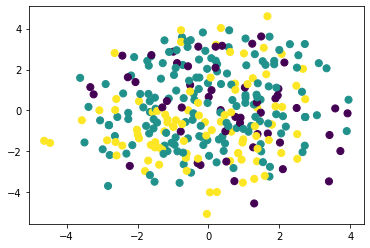

(26752, 10)


In [7]:
def scatter(data, labels, numPoints):

    numEntries = data.shape[0]
    #start = rand.randint(0, numEntries - numPoints)
    start = 0
    #start2 = rand.randint(0, numEntries - numPoints)
    #start3 = rand.randint(0, numEntries - numPoints)
    end = start + numPoints
    #end2 = rand.randint(0, numEntries - numPoints)
    #end3 = rand.randint(0, numEntries - numPoints)
    data = data.iloc[start:end, :]
    #data = pd.concat([data, data.iloc[start2:end2, :], data.iloc[start3:end3]])
    #data = data.sample(300)
    labels = labels.iloc[start:end]
    
    mds = MDS(n_components=2)
    mds_data = mds.fit_transform(data.iloc[:, :-1])
    plt.scatter(mds_data[:, 0], mds_data[:, 1], c=labels, s=50)
    plt.show()

print(type(data_Y))
print(type(data_X))
print(data_X.shape)
scatter(data_X, data_Y, 300)
print(data_X.shape)

Silhouette Score for  2  clusters =  0.1991997363419553
Silhouette Score for  3  clusters =  0.14385321640566034
Silhouette Score for  4  clusters =  0.1447607943666486
Best num_clusters = 2
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(26752, 10) (26752,)


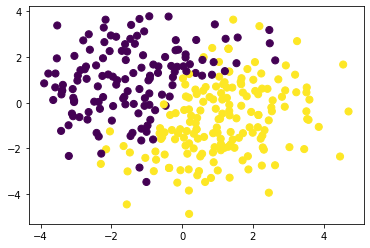

In [9]:
#k-means clustering
best_predicted_labels = None
best_silhouette = 0
best_num_clusters = 0

for num_clusters in range (2,5):
    kmeans = KMeans(n_clusters = num_clusters)
    predicted_labels = kmeans.fit_predict(data_X)
    predicted_labels = Series(predicted_labels)
    
    silhouette = silhouette_score(data_X, predicted_labels)
    if(silhouette > best_silhouette):
        best_silhouette = silhouette
        best_num_clusters = num_clusters
        best_predicted_labels = predicted_labels
    print('Silhouette Score for ', num_clusters, ' clusters = ', silhouette)
    
#plot the best one
print("Best num_clusters =", best_num_clusters)
print(type(data_X), type(best_predicted_labels))
print(data_X.shape, best_predicted_labels.shape)
scatter(data_X, best_predicted_labels, 300)


(26752, 10)
distances
 [[0.         0.92954192 0.97591291 1.03091395]
 [0.         0.         0.         0.9756237 ]
 [0.         0.         0.65835323 0.65835323]
 ...
 [0.         2.13611494 2.54284709 2.54950177]
 [0.         0.         0.92239989 0.95771963]
 [0.         0.         0.         0.72744845]]
[0.         0.         0.         ... 4.70693973 4.73364061 4.79977044]


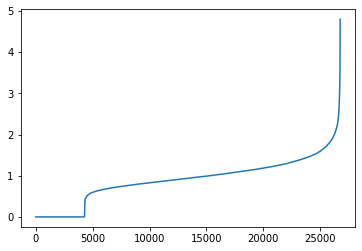

In [10]:
#dbscan clustering
#input song, and get 5 nearest neighbors
print(data_X.shape)
#print(data.head())
nn = NearestNeighbors(n_neighbors = 4).fit(data_X)
distances, indices = nn.kneighbors(data_X)
print("distances\n", distances)
distanceToK4 = distances[:, 3] #all rows, column 3

np.ndarray.sort(distanceToK4)
print(distanceToK4)
plt.plot(distanceToK4)
plt.show()

 0    26639
-1       89
 2        8
 1        6
 3        5
 4        5
dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
26747    0
26748    0
26749    0
26750    0
26751    0
Length: 26752, dtype: int64   1       2.0
2       2.0
3       2.0
4       2.0
5       2.0
       ... 
2156    2.0
2157    2.0
2158    2.0
2159    1.0
2160    1.0
Name: popularity, Length: 26752, dtype: float64
(26752, 10) (26752,)


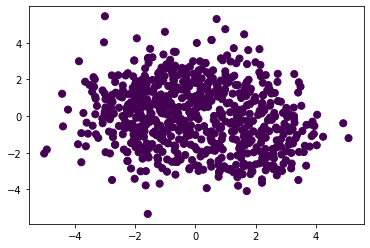

In [11]:
dbscan = DBSCAN(eps = 2.5, min_samples = 4)
predicted_labels = dbscan.fit_predict(data_X)

predicted_labels = Series(predicted_labels)
print(predicted_labels.value_counts())
print(predicted_labels," ",data_Y) 
print(data_X.shape, predicted_labels.shape)
scatter(data_X, predicted_labels, 700)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.25)
print(type(X_train))
print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

<class 'pandas.core.frame.DataFrame'>
X_train= (20064, 10)  y_train= (20064,)
X_test= (6688, 10)  y_test= (6688,)


In [15]:
y_train.head(10)

534     2.0
882     2.0
1504    3.0
4409    2.0
1508    1.0
461     2.0
1242    1.0
4316    1.0
516     2.0
6735    2.0
Name: popularity, dtype: float64

In [25]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth = 100)
clf = clf.fit(X_train, y_train)     # train it on the training data
preds = clf.predict(X_test)        # run the test set through the tree
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))   # how well did it do?
#skl.tree.plot_tree(clf)

Accuracy on test data is: 0.6981160287081339
